In [41]:
import pandas as pd

df_sales = pd.read_csv('Car Analysis UK\\Sales_table.csv')
df_basic = pd.read_csv('Car Analysis UK\\basic_table.csv')
df_price = pd.read_csv('Car Analysis UK\\price_table.csv')



In [10]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6333 entries, 0 to 6332
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Maker        6333 non-null   object
 1   Genmodel     6333 non-null   object
 2   Genmodel_ID  6333 non-null   object
 3   Year         6333 non-null   int64 
 4   Entry_price  6333 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 247.5+ KB


In [30]:
# I´m not interested in luxury cars that gives high dispersion  
df_price = df_price[df_price['Entry_price']< 50000]
df_price

,Maker,Genmodel,Genmodel_ID,Year,Entry_price
0,Abarth,124 Spider,2_1,2016,29365
1,Abarth,124 Spider,2_1,2017,26665
2,Abarth,124 Spider,2_1,2018,26665
3,Abarth,124 Spider,2_1,2019,29515
4,Abarth,500,2_2,2009,13400
...,...,...,...,...,...
6328,Volvo,V50,96_9,2008,15780
6329,Volvo,V50,96_9,2009,15770
6330,Volvo,V50,96_9,2010,17465
6331,Volvo,V50,96_9,2011,17615


We see in the next charts that prices and number of unit droped during pandemy because of lack of components, but prices sky rocketed because companies sold less car but saw the oportunity of get more margin

<Axes: xlabel='Year'>

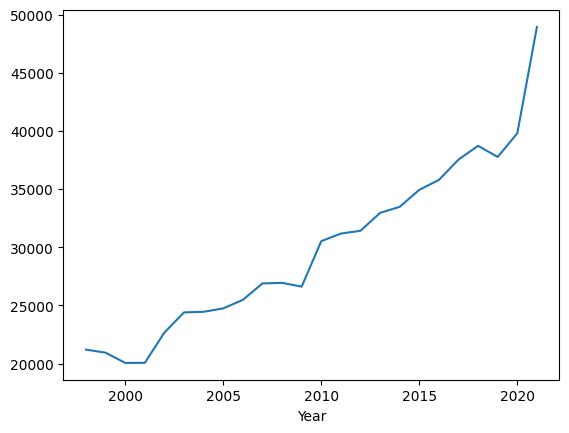

In [85]:
# Average price of cars per year
df= df_price.groupby('Year')['Entry_price'].mean().astype(int) #.reset_index()
# df[df['Year'] >= 2001].plot(x='Year', y='Entry_price')
# df.info()
df.plot()

Top year of sales was 2016, after that came pandemy with a drop of almost 30% in sales

Last years of sales
 Date
2016    2476613
2017    2290444
2018    2212385
2019    2178658
2020    1530118
Name: Units, dtype: int32
Reduccion of sales= 29.0


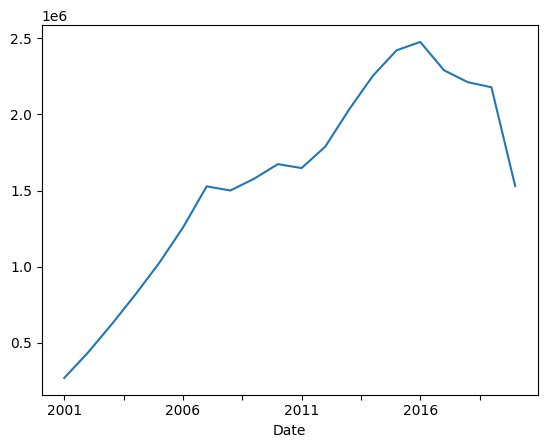

In [105]:
df = df_sales.drop(columns=['Maker', 'Genmodel', 'Genmodel_ID']) 
df= df.melt(var_name="Date", 
        value_name="Units")

df =df.groupby('Date')['Units'].sum().astype(int)
df.plot()
print('Last years of sales\n', df.tail(5))
print(f"Reduccion of sales=", (100 -(1530118 / 2178658 * 100)) // 1)

38.2173153415572